### **Assignment**
**`Usman Tariq`**

> - **I have Trained the Model on `MNIST` dataset and Saved the Model.**
> - **In this assignment, we will load the dataset and Apply to 10 different handwritten `png` pictures.**

**Import Libraries**

In [1]:
import tensorflow as tf 
from tensorflow import keras
import matplotlib.pyplot as plt
from keras.models import load_model
from PIL import Image
import numpy as np

**Import Data**

In [2]:
# load the mnist dataset
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

**Display the Sample from Imported `MNIST` Data**

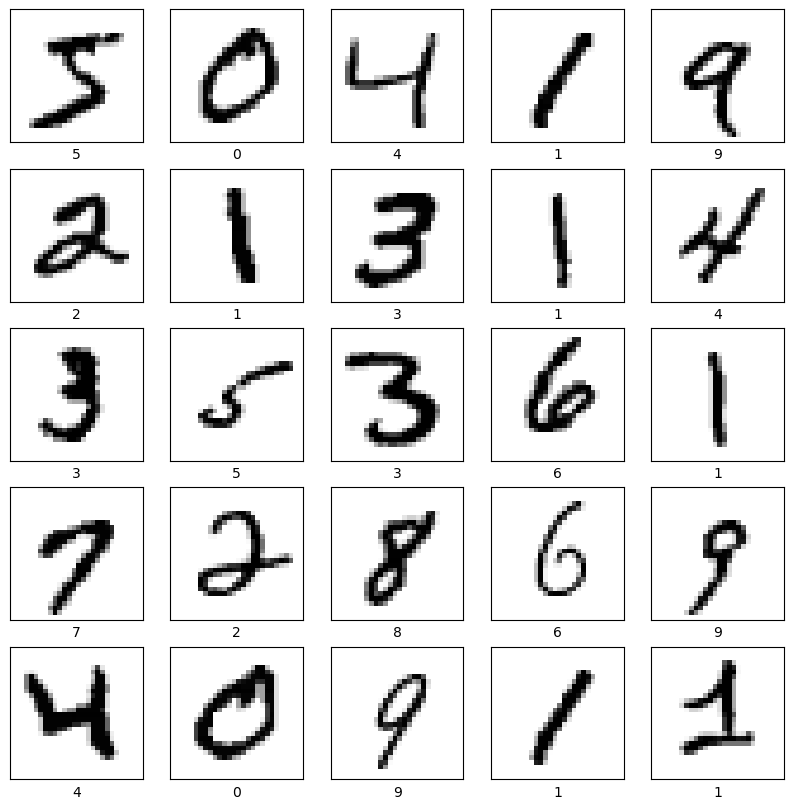

In [3]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])

**Shape of the Data**

In [4]:
print("Shape of X_train:", train_images.shape, '\n')
print("Shape of y_train:", train_labels.shape, '\n')
print("Shape of X_test:", test_images.shape, '\n')
print("Shape of y_test:", test_labels.shape, '\n')

Shape of X_train: (60000, 28, 28) 

Shape of y_train: (60000,) 

Shape of X_test: (10000, 28, 28) 

Shape of y_test: (10000,) 



Pixels of the first image in the test set:


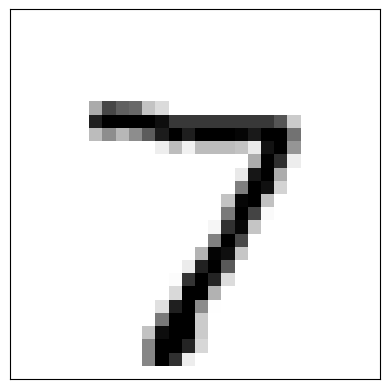

Pixels of the first image in the test set:
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0  84 185 159 151  60  36   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0 222 254 254 254 254 241 198 1

In [5]:
print("Pixels of the first image in the test set:")
plt.imshow(test_images[0], cmap = plt.cm.binary)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.show()

print("Pixels of the first image in the test set:")
for row in test_images[0]:
    for pixel in row:
        print("{:3}".format(pixel), end=' ')
    print()

**Normalize the Data**

In [6]:
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

Pixels after Normalization of the first image in the test set:
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   1   1   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   1   1  

<Figure size 640x480 with 0 Axes>

<Axes: >

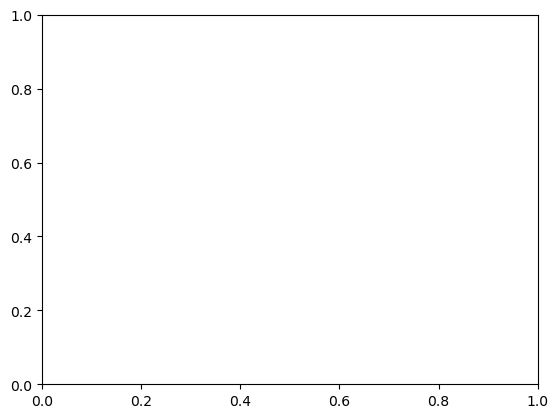

In [7]:
print("Pixels after Normalization of the first image in the test set:")
for row in test_images[0]:
    for pixel in row:
        print("{:3.0f}".format(pixel), end=' ')
    print()

# Reshape the first test image to include a channel dimension
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

# Display the complete output of the first test image
display(plt.gcf())
display(plt.gca())

**Build the Model**

In [8]:
import tensorflow as tf 
from tensorflow.keras import layers

# Create an input layer.
input_layer = layers.Input(shape=(28, 28, 1))

# Define the CNN model
model = tf.keras.Sequential([
    # Add the convolutional layers
    input_layer,        # Add the input layer
    layers.Conv2D(filters=10, kernel_size=(3, 3), activation='relu'),    # Add the first convolutional layer
    layers.Conv2D(filters=10, kernel_size=(3, 3), activation='relu'),    # Add the second convolutional layer
    layers.MaxPooling2D((2, 2)),        # Add the max pooling layer
    layers.Flatten(),        # Add the flatten layer
    layers.Dense(10, activation='softmax')        # Add the output layer
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 10)        100       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 10)        910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 10)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 1440)              0         
                                                                 
 dense (Dense)               (None, 10)                14410     
                                                                 
Total params: 15,420
Trainable params: 15,420
Non-trainable params: 0
____________________________________________________

**Compile the Model**

In [10]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

**Train the Model**

In [11]:
# Train the model
model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
750/750 [==============================] - 6s 6ms/step - loss: 0.3387 - accuracy: 0.9009 - val_loss: 0.1462 - val_accuracy: 0.9588
Epoch 2/5
750/750 [==============================] - 4s 6ms/step - loss: 0.1041 - accuracy: 0.9693 - val_loss: 0.0839 - val_accuracy: 0.9773
Epoch 3/5
750/750 [==============================] - 19s 25ms/step - loss: 0.0739 - accuracy: 0.9772 - val_loss: 0.0722 - val_accuracy: 0.9807
Epoch 4/5
750/750 [==============================] - 4s 6ms/step - loss: 0.0614 - accuracy: 0.9812 - val_loss: 0.0642 - val_accuracy: 0.9821
Epoch 5/5
750/750 [==============================] - 4s 5ms/step - loss: 0.0514 - accuracy: 0.9843 - val_loss: 0.0705 - val_accuracy: 0.9810


**Evaluate the Model**

In [12]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

313/313 [==============================] - 1s 3ms/step - loss: 0.0560 - accuracy: 0.9827
Test accuracy: 0.982699990272522
Test loss: 0.055967286229133606


**Save the Model**

In [13]:
# Save the model
model.save("trained_models/mnist_model.h5")

**Load the Model**

In [14]:
# Load the saved model
mnist_model = load_model('./trained_models/mnist_model.h5')

**Make Predictions**

1/1 [==============================] - 0s 132ms/step
----------------------------------------------------------------------------------------
Model Predict the number: 3
The Original Picture is:


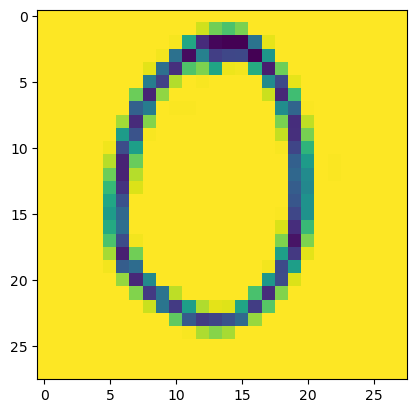

1/1 [==============================] - 0s 19ms/step
----------------------------------------------------------------------------------------
Model Predict the number: 8
The Original Picture is:


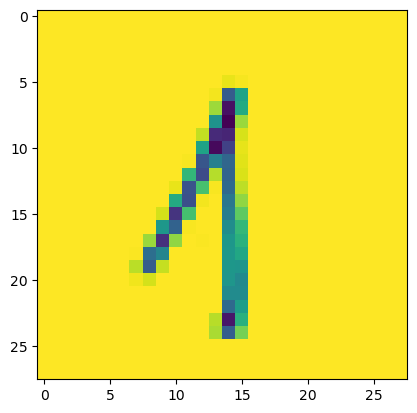

1/1 [==============================] - 0s 18ms/step
----------------------------------------------------------------------------------------
Model Predict the number: 8
The Original Picture is:


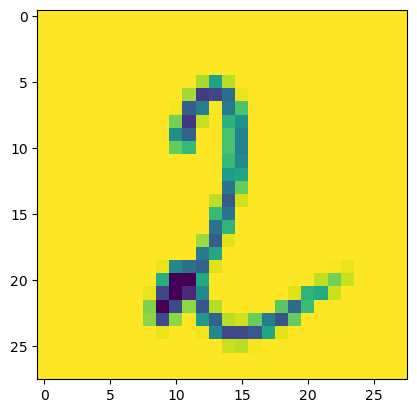

1/1 [==============================] - 0s 18ms/step
----------------------------------------------------------------------------------------
Model Predict the number: 8
The Original Picture is:


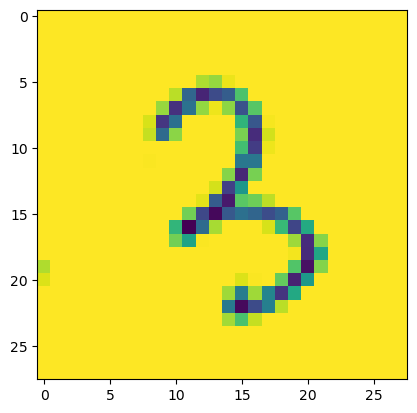

1/1 [==============================] - 0s 19ms/step
----------------------------------------------------------------------------------------
Model Predict the number: 8
The Original Picture is:


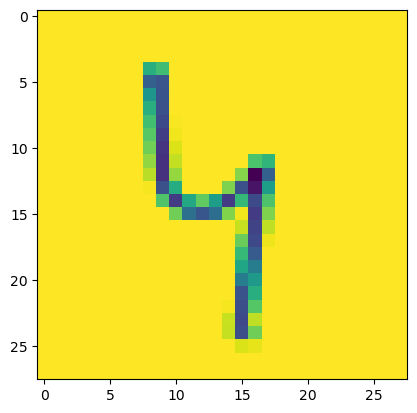

1/1 [==============================] - 0s 17ms/step
----------------------------------------------------------------------------------------
Model Predict the number: 8
The Original Picture is:


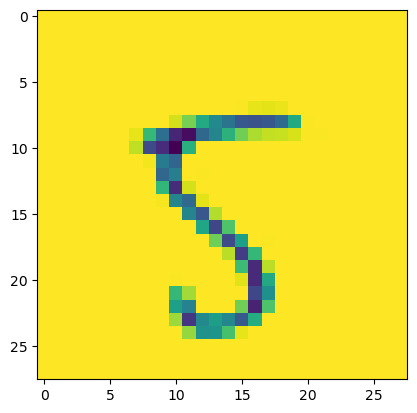

1/1 [==============================] - 0s 20ms/step
----------------------------------------------------------------------------------------
Model Predict the number: 8
The Original Picture is:


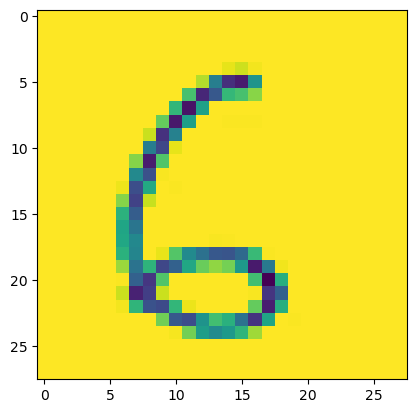

1/1 [==============================] - 0s 19ms/step
----------------------------------------------------------------------------------------
Model Predict the number: 3
The Original Picture is:


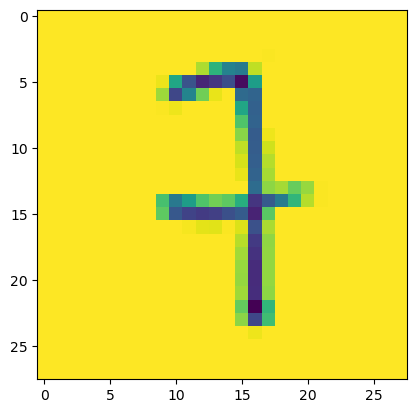

1/1 [==============================] - 0s 18ms/step
----------------------------------------------------------------------------------------
Model Predict the number: 8
The Original Picture is:


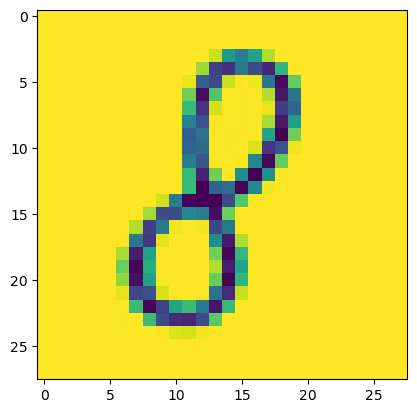

1/1 [==============================] - 0s 17ms/step
----------------------------------------------------------------------------------------
Model Predict the number: 8
The Original Picture is:


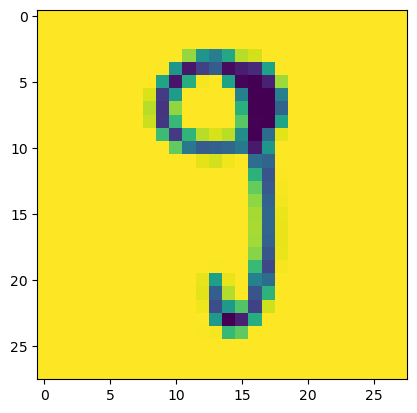

In [15]:
# List the paths of ten PNG images
image_paths = [
    './images/zero.png',
    './images/one.png',
    './images/two.png',
    './images/three.png',
    './images/four.png',
    './images/five.png',
    './images/six.png',
    './images/seven.png',
    './images/eight.png',
    './images/nine.png'
]

for img_path in image_paths:
    img = Image.open(img_path).convert('L').resize((28, 28))
    img_array = np.expand_dims(np.array(img), axis=0).reshape((1, 28, 28, 1)).astype('float32') / 255.0
    prediction = np.argmax(mnist_model.predict(img_array)[0])
    print('----------------------------------------------------------------------------------------')
    print(f"Model Predict the number: {prediction}")
    print("The Original Picture is:")
    plt.imshow(img)
    plt.show()